In [1]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d olgabelitskaya/flower-color-images

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/olgabelitskaya/flower-color-images
License(s): other
 66% 33.0M/50.1M [00:00<00:00, 95.0MB/s]
100% 50.1M/50.1M [00:00<00:00, 107MB/s] 


In [2]:
!unzip flower-color-images.zip

Archive:  flower-color-images.zip
  inflating: FlowerColorImages.h5    
  inflating: flower_images/flower_images/0001.png  
  inflating: flower_images/flower_images/0002.png  
  inflating: flower_images/flower_images/0003.png  
  inflating: flower_images/flower_images/0004.png  
  inflating: flower_images/flower_images/0005.png  
  inflating: flower_images/flower_images/0006.png  
  inflating: flower_images/flower_images/0007.png  
  inflating: flower_images/flower_images/0008.png  
  inflating: flower_images/flower_images/0009.png  
  inflating: flower_images/flower_images/0010.png  
  inflating: flower_images/flower_images/0011.png  
  inflating: flower_images/flower_images/0012.png  
  inflating: flower_images/flower_images/0013.png  
  inflating: flower_images/flower_images/0014.png  
  inflating: flower_images/flower_images/0015.png  
  inflating: flower_images/flower_images/0016.png  
  inflating: flower_images/flower_images/0017.png  
  inflating: flower_images/flower_images/001

In [3]:
!pip install tensorflow
! pip install keras
! pip install pillow

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

# Load an image using PIL
image1_path = 'flowers/flowers/19_010.png'
original_image1 = Image.open(image1_path)

image2_path = 'flowers/flowers/00_003.png'
original_image2 = Image.open(image2_path)

# Display the original image using matplotlib
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axes[0].imshow(original_image1)
axes[0].set_title("Image 1")
axes[0].axis("off")  # Hide the axis for better visualization

# Display the second image
axes[1].imshow(original_image2)
axes[1].set_title("Image 2")
axes[1].axis("off")  # Hide the axis

# Show both images
plt.show()


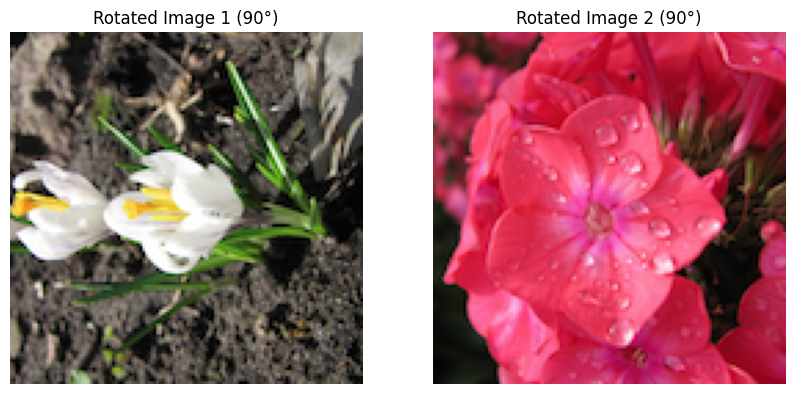

In [5]:
from scipy.ndimage import rotate

def rotate_image_90_degrees(image):
  return rotate(image, 90, reshape = True) #complete it

# Apply rotation to both images
rotated_image1 = rotate_image_90_degrees(original_image1)
rotated_image2 = rotate_image_90_degrees(original_image2)

# Display both rotated images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(rotated_image1)
axes[0].set_title("Rotated Image 1 (90°)")
axes[0].axis("off")

axes[1].imshow(rotated_image2)
axes[1].set_title("Rotated Image 2 (90°)")
axes[1].axis("off")

plt.show()

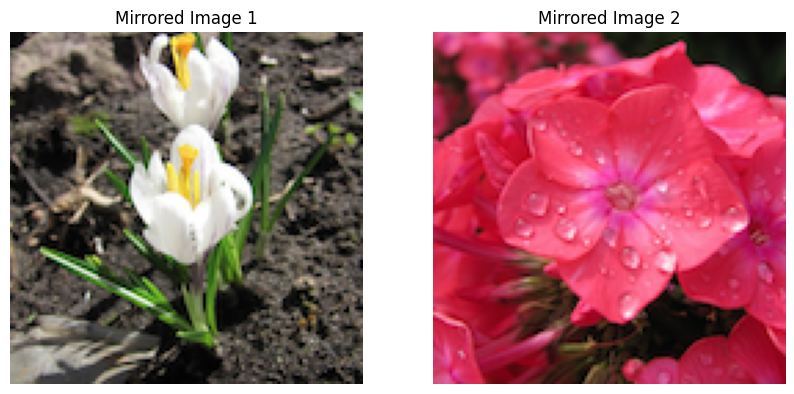

In [6]:
from PIL import ImageOps

mirrored_image1 = ImageOps.mirror(original_image1)
mirrored_image2 = ImageOps.mirror(original_image2)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(mirrored_image1)
axes[0].set_title("Mirrored Image 1")
axes[0].axis("off")

axes[1].imshow(mirrored_image2)
axes[1].set_title("Mirrored Image 2")
axes[1].axis("off")

plt.show()

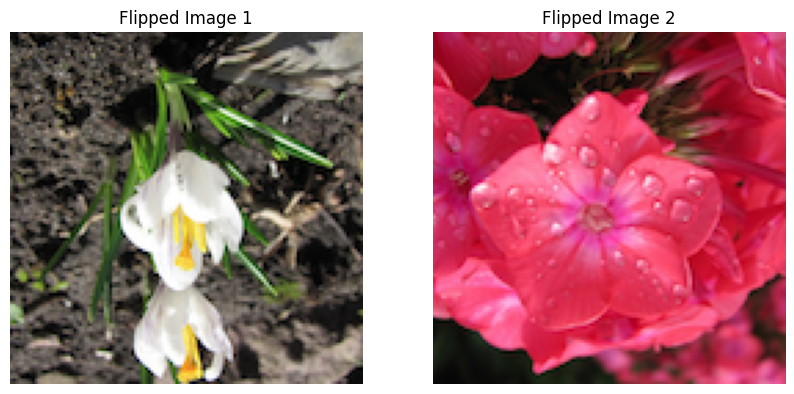

In [7]:
flipped_image1 = ImageOps.flip(original_image1)
flipped_image2 = ImageOps.flip(original_image2)

# To display one image only :
# plt.imshow(flipped_image)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(flipped_image1)
axes[0].set_title("Flipped Image 1")
axes[0].axis("off")

axes[1].imshow(flipped_image2)
axes[1].set_title("Flipped Image 2")
axes[1].axis("off")

plt.show()

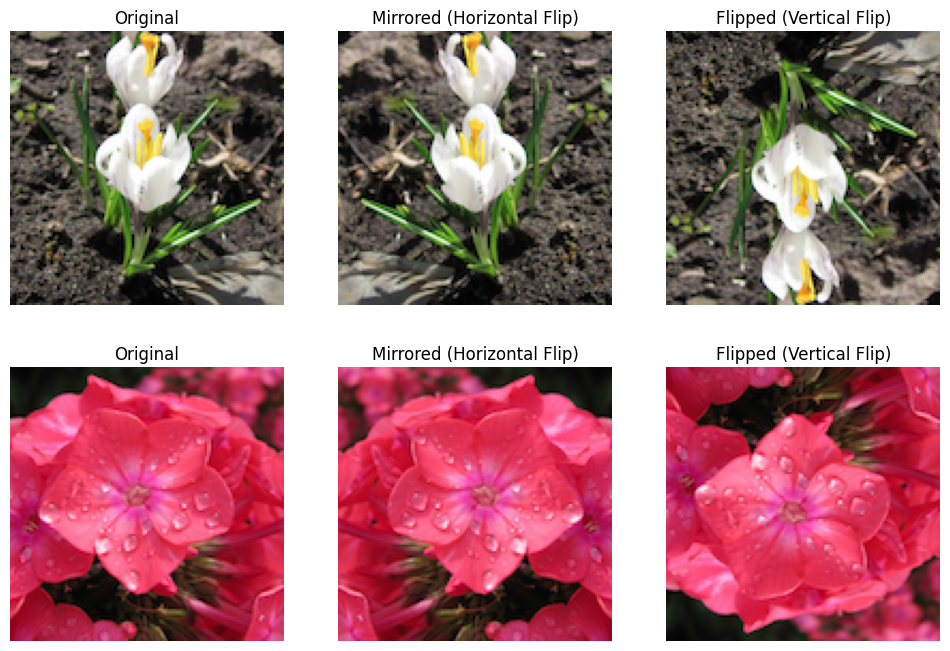

In [8]:
# Create a figure 'fig' with 2 row and 3 columns
# (so 3 subgraphs for each image)
# axes is a list of the 3 subgraphs
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Images to display
images = [original_image1, mirrored_image1, flipped_image1, # row 1 (Image 1)
          original_image2, mirrored_image2, flipped_image2] # row 2 (Image 2)
titles = ["Original", "Mirrored (Horizontal Flip)", "Flipped (Vertical Flip)",
          "Original", "Mirrored (Horizontal Flip)", "Flipped (Vertical Flip)"]

for i, ax in enumerate(axes.flat): # index 'i', object 'ax'
    ax.imshow(images[i])
    ax.set_title(titles[i])
    ax.axis("off")

plt.show()


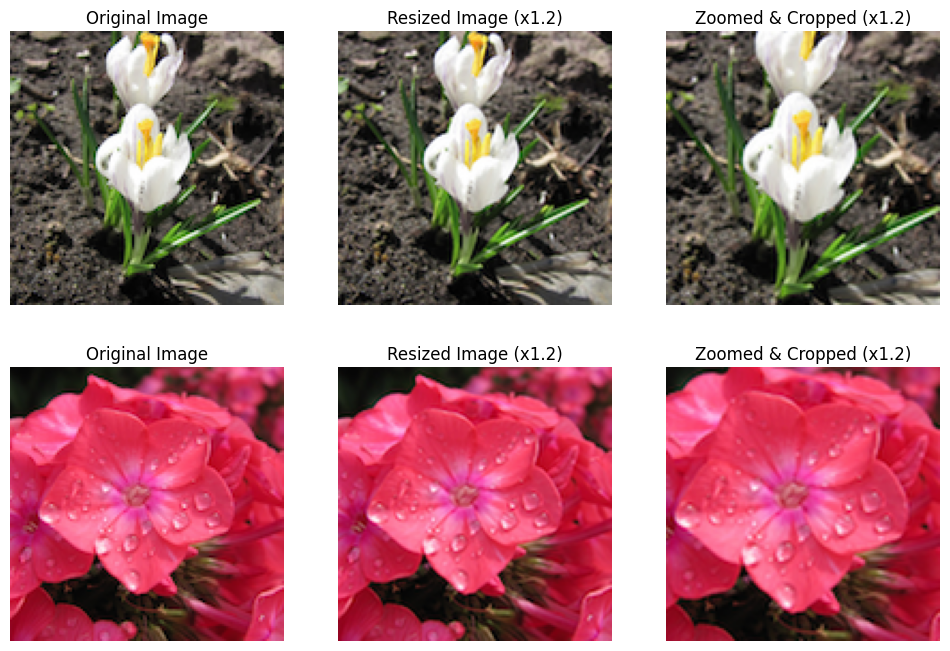

In [9]:
def zoom_image(image, scale=1.2):
  width, height = image.size

  new_width = int(width * scale)
  new_height = int(height * scale)

  return image.resize((new_width, new_height), Image.LANCZOS)
#==============================================================

def zoom_and_crop(image, scale=1.2):
    width, height = image.size

    new_width = int(width * scale)
    new_height = int(height * scale)

    zoomed = image.resize((new_width, new_height), Image.LANCZOS)

    # Coordonates to crop to center
    left = (new_width - width) // 2
    top = (new_height - height) // 2
    right = left + width
    bottom = top + height

    # Crop image after zooming
    cropped = zoomed.crop((left, top, right, bottom))

    return cropped
#==============================================================
# Image 1
zoomed_image1 = zoom_image(original_image1)
zoomed_cropped1 = zoom_and_crop(original_image1, scale=1.2)
# Image 2
zoomed_image2 = zoom_image(original_image2)
zoomed_cropped2 = zoom_and_crop(original_image2, scale=1.2)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Image 1
axes[0, 0].imshow(original_image1) # Original image
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(zoomed_image1)  # Version without crop
axes[0, 1].set_title("Resized Image (x1.2)")
axes[0, 1].axis("off")

axes[0, 2].imshow(zoomed_cropped1)  # Version with crop
axes[0, 2].set_title("Zoomed & Cropped (x1.2)")
axes[0, 2].axis("off")

# Image 2
axes[1, 0].imshow(original_image2) # Original image
axes[1, 0].set_title("Original Image")
axes[1, 0].axis("off")

axes[1, 1].imshow(zoomed_image2)  # Version without crop
axes[1, 1].set_title("Resized Image (x1.2)")
axes[1, 1].axis("off")

axes[1, 2].imshow(zoomed_cropped2)  # Version with crop
axes[1, 2].set_title("Zoomed & Cropped (x1.2)")
axes[1, 2].axis("off")

plt.show()